# L2 Data Visualization Notebook

This report comprises the entire Data Visualization of the L2 data (Level 2 Data)  of the Hotel Recommendation system built. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the Parquet file into a DataFrame
file_path = '../output/l2_data_2024-08-01_15-28-04.parquet'
df = pd.read_parquet(file_path)

df

,region,hotel_name,avg_rating,user_ratings_total,review_rating,review_date_in_days,review_language,review_length,review_text_features,latitude,longitude,distance_to_ski_resort,distance_to_city_center
0,Ordino,Apartaments del Meligar,4.8,175,5.0,0,es,92,"{'type': 0, 'size': 20, 'indices': [0, 4, 7, 1...",42.532680,1.576841,5.754313,5.340645
1,Ordino,Annapurna Aparthotel,4.2,600,5.0,1825,es,414,"{'type': 0, 'size': 20, 'indices': [0, 1, 2, 3...",42.590209,1.524379,3.425662,9.167398
2,Ordino,Hotel Milà,4.4,479,4.0,2190,en,82,"{'type': 0, 'size': 20, 'indices': [1, 2, 3, 4...",42.533531,1.610510,8.285059,7.866307
3,La Massana,Hotel Montané,4.2,324,5.0,1460,en,137,"{'type': 0, 'size': 20, 'indices': [1, 2, 3, 4...",42.572868,1.483891,3.111637,7.851201
4,Sant Julià de Lòria,HOTEL SANT ELOI,3.2,1348,3.0,1460,en,161,"{'type': 0, 'size': 20, 'indices': [0, 3, 4, 8...",42.452963,1.491823,1.157777,6.553227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30753,Andorra la Vella,Hotel Best Andorra Center,3.8,2936,5.0,1825,en,54,"{'type': 0, 'size': 20, 'indices': [1, 3, 4, 5...",42.507707,1.520516,5.374320,0.048966
30754,Andorra la Vella,Aston Hotel,3.7,714,1.0,270,es,214,"{'type': 0, 'size': 20, 'indices': [0, 1, 3, 4...",42.507694,1.531883,5.546249,0.883935
30755,Ordino,Hotel Ordino,4.4,181,5.0,730,ro,5,"{'type': 0, 'size': 20, 'indices': [10], 'valu...",42.555997,1.533954,1.634518,5.461807
30756,Escaldes-Engordany,Hotel Metropolis,4.5,589,5.0,0,en,575,"{'type': 0, 'size': 20, 'indices': [0, 1, 2, 3...",42.510269,1.540957,5.523667,1.650654


## 1. Distribution of Average Ratings

Plot the distribution of Hotel ratings per average

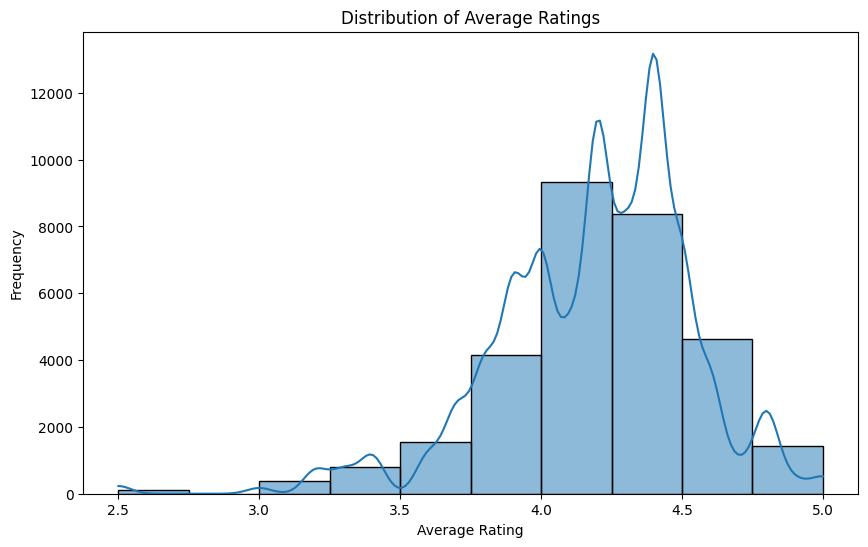

In [20]:
# Distribution of Average Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

## 2. Review Length Distribution

Plot the length of each review and its frequency

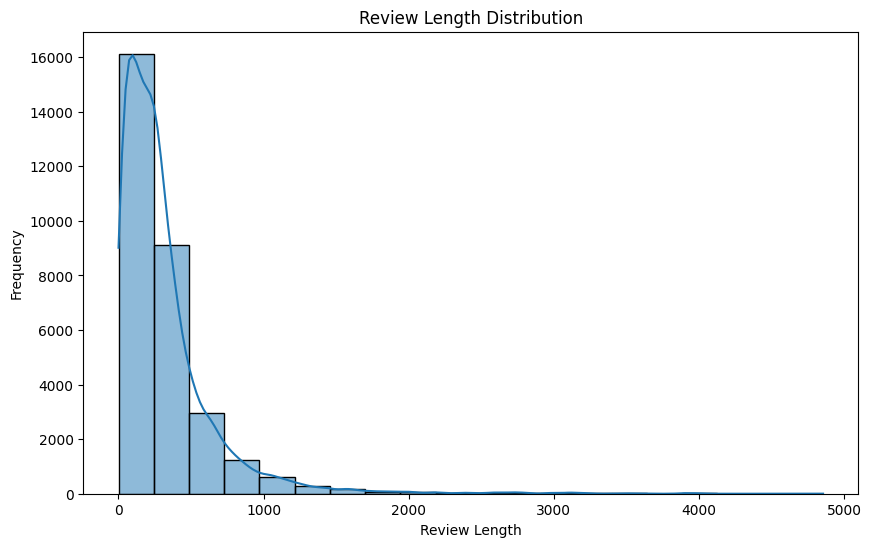

In [21]:
# Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## 3. Distance to Ski resorts

Plot the minimum distance to a ski resort and its frequency. 

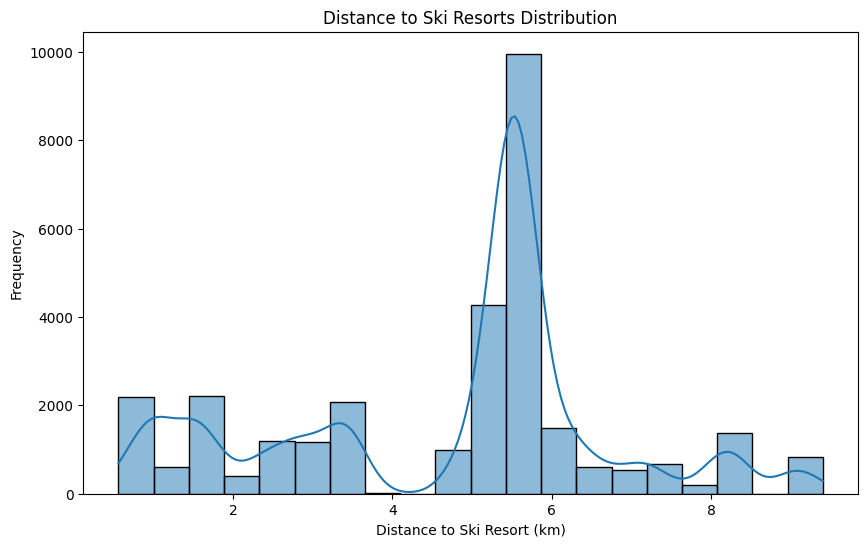

In [22]:
# Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_ski_resort'], bins=20, kde=True)
plt.title('Distance to Ski Resorts Distribution')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Frequency')
plt.show()

## 4. Distance to city center

Plot the minimum distance to the city center per hotel, and its frequency. 

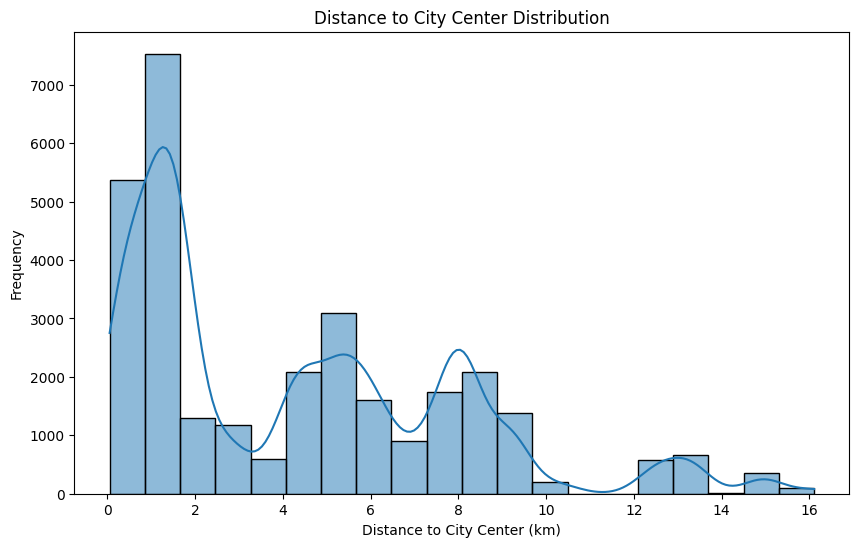

In [23]:
# Distance to City Center
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_city_center'], bins=20, kde=True)
plt.title('Distance to City Center Distribution')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Frequency')
plt.show()

## 5. Ratings vs Distance to Ski resort

Plot the average rating of a hotel based on the distance to a ski resort

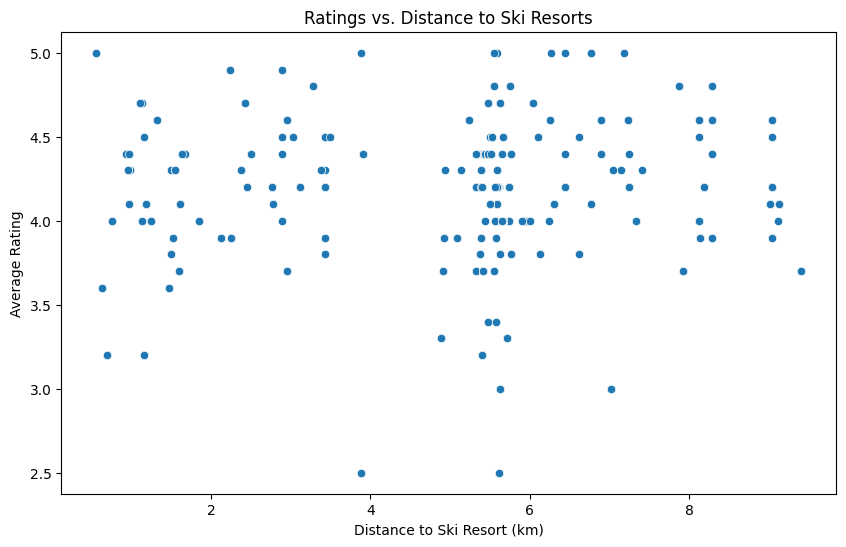

In [24]:
# Ratings vs. Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_ski_resort', y='avg_rating')
plt.title('Ratings vs. Distance to Ski Resorts')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Average Rating')
plt.show()

## 6. Ratings vs Distance to city center

Plot the average rating of a hotel based on the distance to the city center

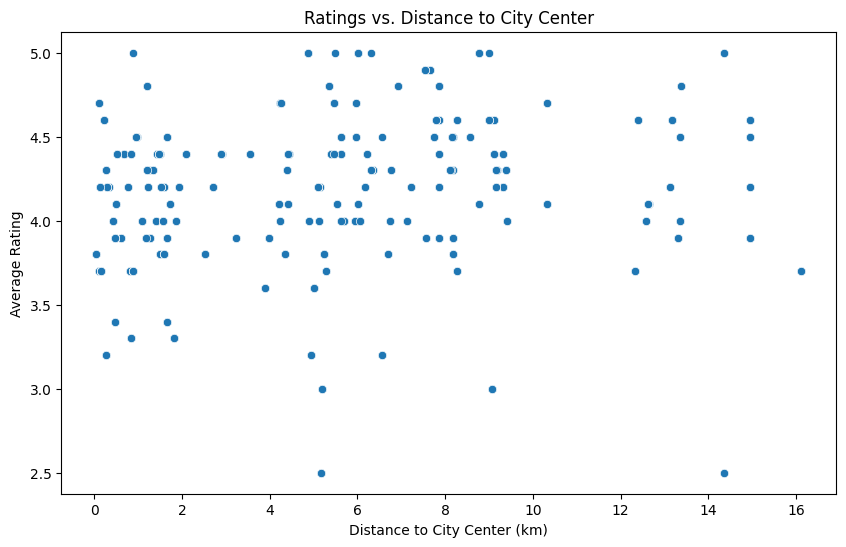

In [25]:
# Ratings vs. Distance to City Center
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_city_center', y='avg_rating')
plt.title('Ratings vs. Distance to City Center')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Average Rating')
plt.show()